<a href="https://colab.research.google.com/github/fmargarit/CoderHouse_DataScience/blob/main/CoderHouse_DataScience_Entrega01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CODERHOUSE
### DATA SCIENCE I - Fundamentos (comision 60935)

*   Profesor:  Jorge RUIZ
*   Tutor:     Diego GASCH
*   Alumno:    Fernando MARGARIT



DATASET: Vehiculos usados en EEUU disponibles para la venta.

OBJETIVO 1: Poder visualmente conocer un precio de venta en caso de contar con un vehiculo usado, considerando Marca, Modelo, Año de Fabricacion, Kilometraje

OBJETIVO 2: Utilizar el dataset para ML y pronosticar su precio de venta


1.   Grafico 1: conocer la cantidad de autos disponibles en el mercado por año de fabricacion y el precio promedio
2.   Grafico 2: distribucion de precios en cada categoria, vizualizando rangos y outliers
3.   Grafico 3: Volumen de vehiculos por las principales Marcas en el mercado de usados
4.   Grafico 4: distribucion de precios en cada marca, vizualizando rangos y outliers








Campos del dataset:


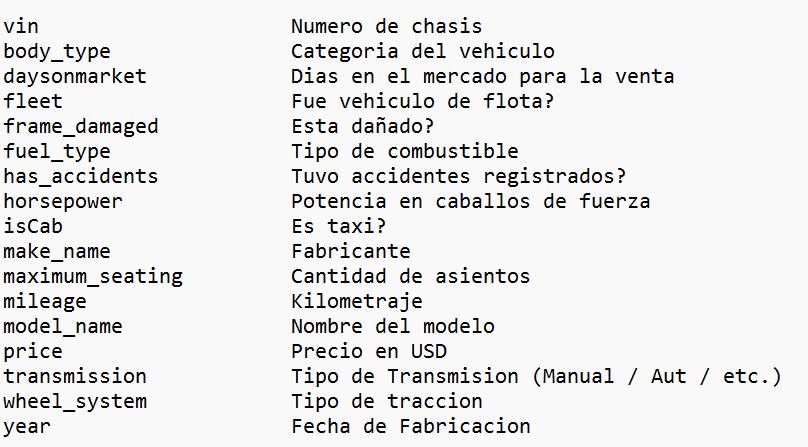

In [2]:
# Importar librerias
import pandas  as pd
import seaborn as sns
import numpy   as np
import matplotlib as mpl
import matplotlib.pyplot as plt



In [3]:
# Importar archivo csv (guardado en Google Drive y en GitHub)
from google.colab import drive
import os
drive.mount('/content/drive')

file = '/content/drive/MyDrive/CODERHOUSE/Data Science I/Entrega I/US USED CARS FOR SALES.csv'
git  = 'https://raw.githubusercontent.com/fmargarit/CoderHouse_DataScience/main/US%20USED%20CARS%20FOR%20SALES.csv'

df = pd.read_csv(git)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# conocer la cantidad de filas y columnas del DataFrame
df.shape

(10000, 17)

In [ ]:
# cantidad de registros con campos NaN
df.isna().sum()

vin                   0
body_type            36
daysonmarket          0
fleet              3327
frame_damaged      3327
fuel_type           269
has_accidents      3327
horsepower          557
isCab              3327
make_name             0
maximum_seating     517
mileage             308
model_name            0
price                 0
transmission        163
wheel_system        465
year                  0
dtype: int64

In [5]:
# se considera que en los casos de fleet, frame_damaged, has_accidents y isCab el valor NaN corresponde a False

df['fleet'].fillna(False, inplace=True)
df['frame_damaged'].fillna(False, inplace=True)
df['has_accidents'].fillna(False, inplace=True)
df['isCab'].fillna(False, inplace=True)
df.isna().sum()


vin                  0
body_type           36
daysonmarket         0
fleet                0
frame_damaged        0
fuel_type          269
has_accidents        0
horsepower         557
isCab                0
make_name            0
maximum_seating    517
mileage            308
model_name           0
price                0
transmission       163
wheel_system       465
year                 0
dtype: int64

In [6]:
#Borrado de registros NaN

#df['body_type'].dropna(inplace=True)
df.dropna(inplace=True)




In [7]:
df.shape

(8891, 17)

In [8]:
df.isna().sum()

vin                0
body_type          0
daysonmarket       0
fleet              0
frame_damaged      0
fuel_type          0
has_accidents      0
horsepower         0
isCab              0
make_name          0
maximum_seating    0
mileage            0
model_name         0
price              0
transmission       0
wheel_system       0
year               0
dtype: int64

Text(0, 0.5, 'Precio Promedio')

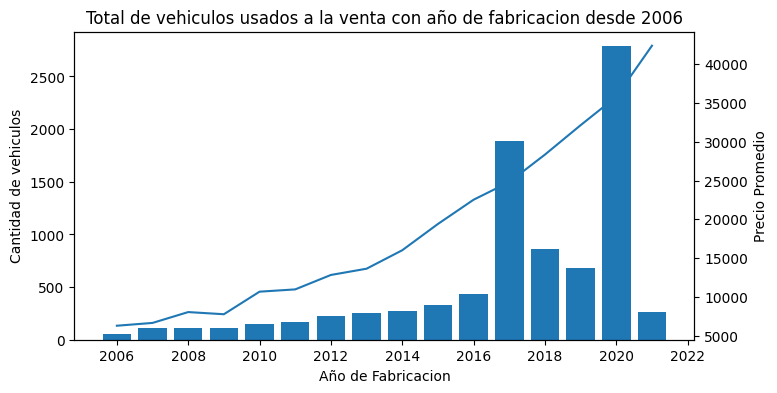

In [9]:
# GRAFICO 1
# Total de vehiculos usados a la venta segun su año de fabricacion incluyendo precio promedio
ventas = ventas = df[df['year'] > 2005].groupby('year').agg({'vin':'count', 'price':'mean'})
ventas.columns = ['Cantidad', 'Precio_Promedio']

fig, ax1 = plt.subplots(figsize=(8,4))
ax1.bar(ventas.index, ventas['Cantidad'])
ax1.set_title('Total de vehiculos usados a la venta con año de fabricacion desde 2006')
ax1.set_ylabel('Cantidad de vehiculos')
ax1.set_xlabel('Año de Fabricacion')

ax2 = ax1.twinx()
ax2.plot(ventas.index, ventas['Precio_Promedio'])
ax2.set_ylabel('Precio Promedio')

Text(0.5, 0, 'Categoria del Vehiculo')

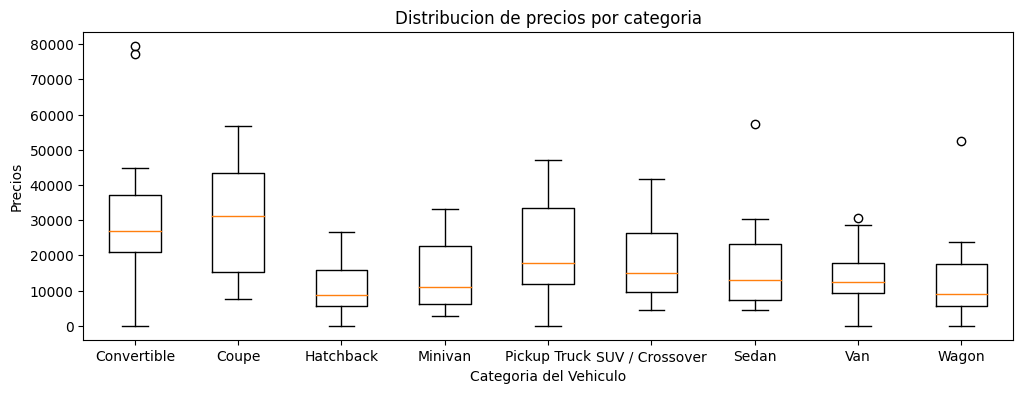

In [10]:
# GRAFICO 2
# Precios por categoria de vehiculo
categoria = df[df['year'] > 2005].pivot_table(values='price', index='year', columns='body_type', aggfunc='mean')
categoria.fillna(0, inplace=True)


fig, ax = plt.subplots(figsize=(12,4))
ax.boxplot(categoria, labels=categoria.columns)
ax.set_title('Distribucion de precios por categoria')
ax.set_ylabel('Precios')
ax.set_xlabel('Categoria del Vehiculo')


Text(0.5, 1.0, 'Dias en el mercado por Marca')

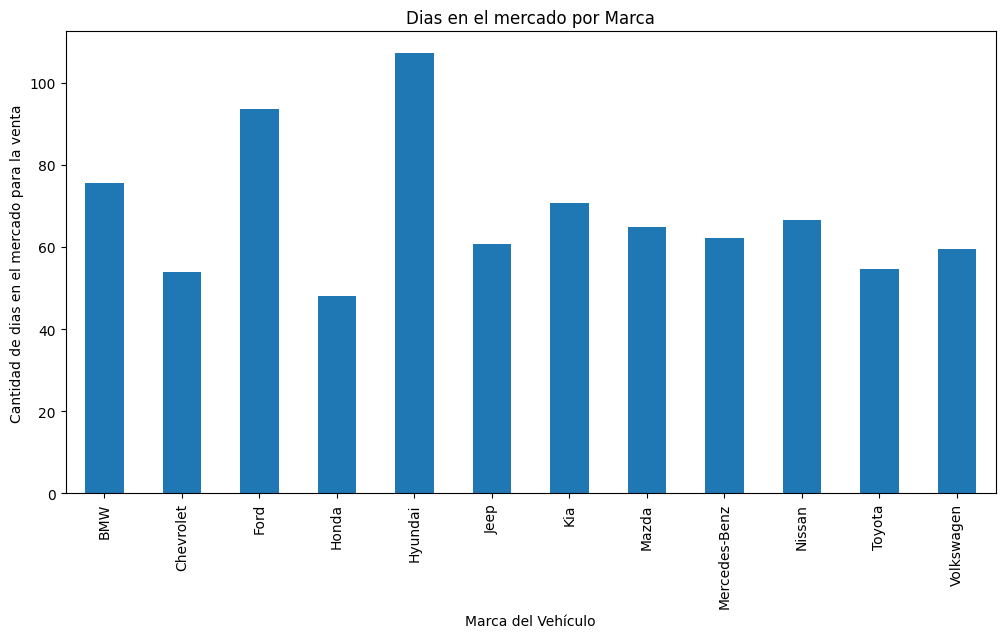

In [12]:
# GRAFICO 3
# Dias promedio en el mercado para venta por Marca
dias = df.groupby(['make_name']).agg({'vin':'count','daysonmarket':'mean'})
dias = dias[dias['vin'] > 300]

dias['daysonmarket'].plot(kind='bar', figsize=(12,6))
plt.xlabel('Marca del Vehículo')
plt.ylabel('Cantidad de dias en el mercado para la venta')
plt.title('Dias en el mercado por Marca')






Text(0.5, 0, 'Categoria del Vehiculo')

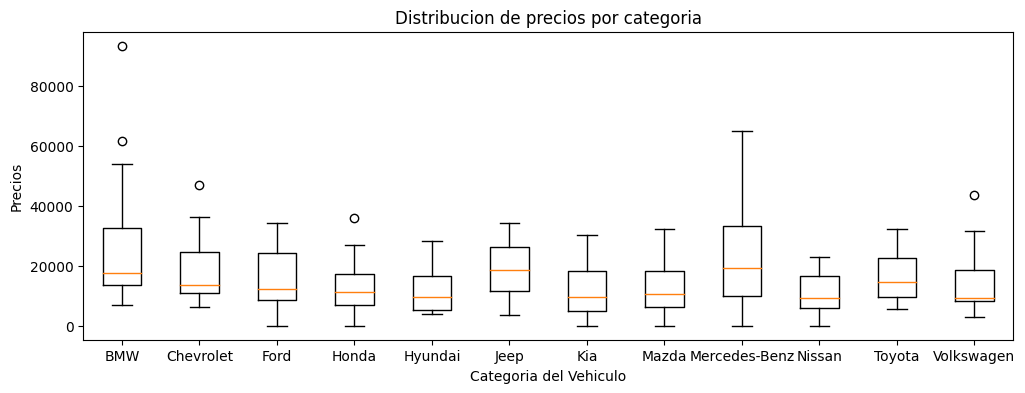

In [14]:
# GRAFICO 4
# Precios por marca de vehiculo

# Agrupar por Marca y cantidad
vta_x_marca = df.groupby('make_name')['vin'].count()

# Filtrar las marcas que tienen más de 300 vehiculos en venta
vta_flitro = vta_x_marca[vta_x_marca > 300].index

# Filtrar el DataFrame original para incluir solo las marcas filtradas
df_vta = df[df['make_name'].isin(vta_flitro)]

# Crear la tabla dinámica
marca = df_vta[df_vta['year'] > 2005].pivot_table(values='price', index='year', columns='make_name', aggfunc='mean')

# Poner en cero los NaN
marca.fillna(0, inplace=True)

fig, ax = plt.subplots(figsize=(12,4))
ax.boxplot(marca , labels=vta_flitro)
ax.set_title('Distribucion de precios por categoria')
ax.set_ylabel('Precios')
ax.set_xlabel('Categoria del Vehiculo')

In [ ]:
# TESTEOS


#categoria = df[['body_type', 'year', 'price']].set_index('body_type')
#categoria = df.groupby(['year','body_type']).agg({'price':'mean'})

#ventas = df.groupby('year').agg({'vin':'count', 'price':'mean'})
#categoria = df[['body_type','make_name','price',]].set_index('make_name')
#categoria.index = categoria['body_type']
#categoria.drop('body_type', axis=1, inplace=True)
#categoria = categoria.T
#df.isna().sum()
#categoria = df[df['year'] > 2005].pivot_table(values='price', index='year', columns='body_type', aggfunc='mean')
#categoria = df.pivot_table(values='price', index='year', aggfunc='mean')

#relacion = df[(df['mileage'] > 1000) & (df['mileage'] < 10000)]
#relacion = df[(df['daysonmarket'] > 30 )]
#plt.figure(figsize=(12,6))

#sns.scatterplot(x=relacion['price'] , y=relacion['mileage'])
#sns.scatterplot(x=relacion['price'] , y=relacion['daysonmarket'])
#plt.xlabel('Precio')
#plt.ylabel('Kilometraje')
#plt.title('Relación entre Precio y Kilometraje del Vehiculo')


